# OpenCV Image Processing
Basic image processing operations which might prove useful for machine learning image detection algorithms.

In [1]:
import cv2
import numpy as np
print(np.__version__)
print(cv2.__version__)

1.14.3
3.2.0


In [2]:
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [10.0,10.0]

## Extracting Object Based On Color
OpenCV allows us to operate on an image based on color. Below we will extract the ball from the image based on its color alone.

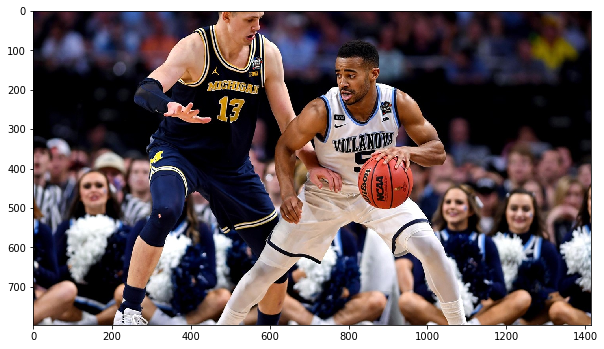

In [4]:
img = cv2.imread("basketball.jpeg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

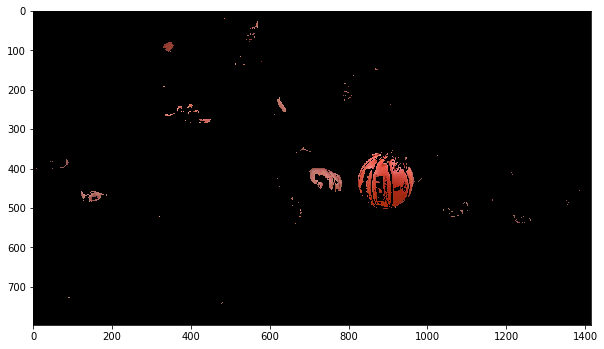

In [5]:
# Easier to operate color in HSV
img_hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)

upper_orange = np.array([6,255,255])
lower_orange = np.array([0,100,140])

mask = cv2.inRange(img_hsv, lower_orange, upper_orange)

img_masked = cv2.bitwise_and(img,img,mask=mask)
plt.imshow(img_masked)

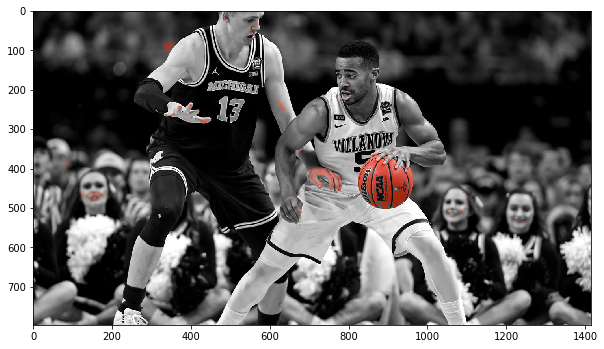

In [6]:
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
img_gray = cv2.cvtColor(img_gray,cv2.COLOR_GRAY2RGB)

img_pre = cv2.bitwise_and(img_gray,img_gray,mask=cv2.bitwise_not(mask))
img_done = cv2.add(img_pre,img_masked)
plt.imshow(img_done)

## Thresholding
We can use threshholding to truncate values of an image. OpenCV provides many thresholding methods.

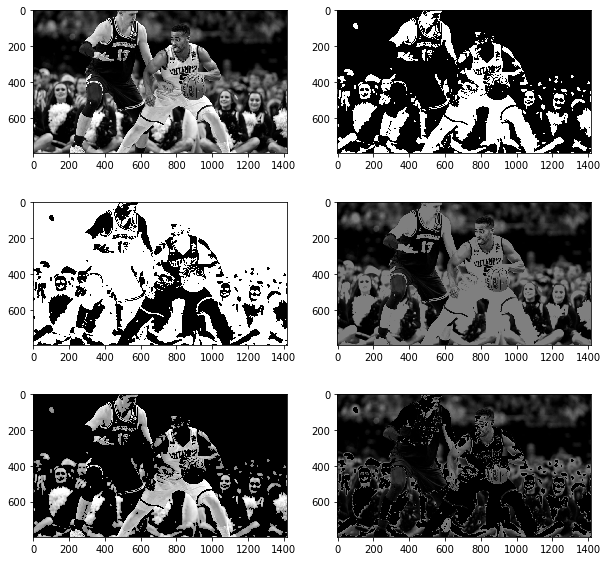

In [7]:
def thresholdAndShow(img,method):
    img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(img,127,255,method)
    return thresh
    
methods = [cv2.THRESH_BINARY,cv2.THRESH_BINARY_INV,cv2.THRESH_TRUNC,cv2.THRESH_TOZERO,cv2.THRESH_TOZERO_INV]

plt.subplot(3,2,1),plt.imshow(img_gray)
for i in range(5):
    plt.subplot(3,2,i+2),plt.imshow(thresholdAndShow(img_gray,methods[i]))
    
plt.show()

It is also possible to perform adaptive thresholding in an image.

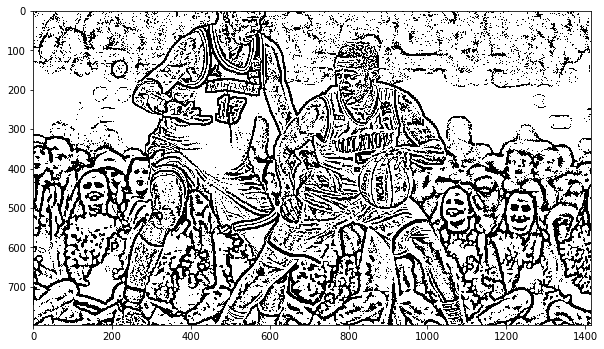

In [8]:
img_thresh = cv2.cvtColor(img_gray,cv2.COLOR_RGB2GRAY)
thresh = cv2.adaptiveThreshold(img_thresh, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
plt.imshow(thresh,'gray')

## Smoothing Images
In image processing we have many techniques for smoothing an image and removing noise.

### Convolution
Smoothing images using matrices:
```
           |1 1 1 1 1|
           |1 1 1 1 1|
K = (1/25) |1 1 1 1 1|
           |1 1 1 1 1|
           |1 1 1 1 1|
```
Using filter2D we can apply any matrix to a pixel.

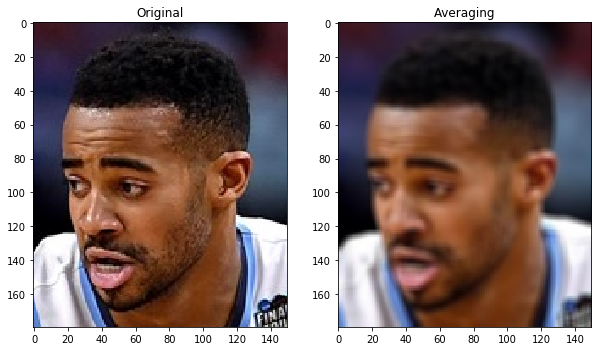

In [9]:
kernel = np.ones((5,5),np.float32)/25
img_roi = img[70:250,750:900]

img_smooth = cv2.filter2D(img_roi,-1,kernel)

plt.subplot(121),plt.imshow(img_roi),plt.title('Original')
plt.subplot(122),plt.imshow(img_smooth),plt.title('Averaging')
plt.show()

### Blurring
OpenCV provided methods to do operations such as the one above.

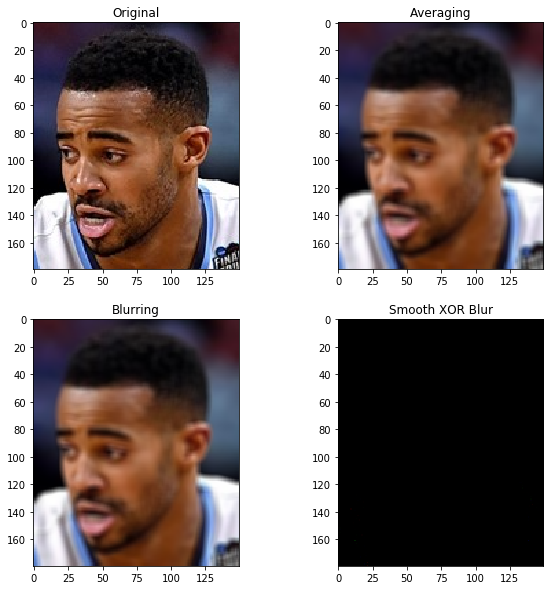

In [10]:
img_blur = cv2.blur(img_roi,(5,5))
plt.subplot(221),plt.imshow(img_roi),plt.title('Original')
plt.subplot(222),plt.imshow(img_smooth),plt.title('Averaging')
plt.subplot(223),plt.imshow(img_blur),plt.title('Blurring')

img_diff = cv2.bitwise_xor(img_smooth,img_blur)

plt.subplot(224),plt.imshow(img_diff),plt.title('Smooth XOR Blur')
plt.show()

### Gaussian Noise

(<matplotlib.image.AxesImage at 0x7fe96c8b0908>, Text(0.5,1,'Noisy Image'))

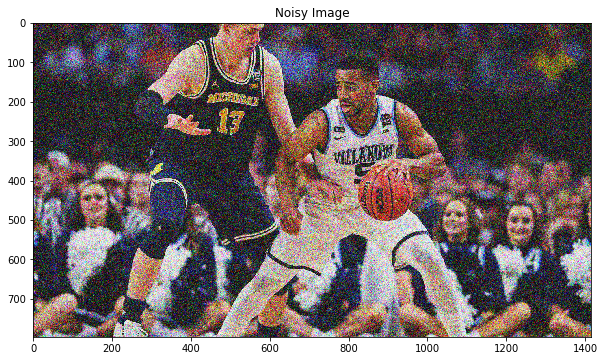

In [11]:
img_noisy = cv2.imread('basketball-noise.tiff')
img_noisy = cv2.cvtColor(img_noisy,cv2.COLOR_BGR2RGB)
plt.imshow(img_noisy),plt.title('Noisy Image')

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe93c4d54e0>,
 Text(0.5,1,'Gaussian Blur'))

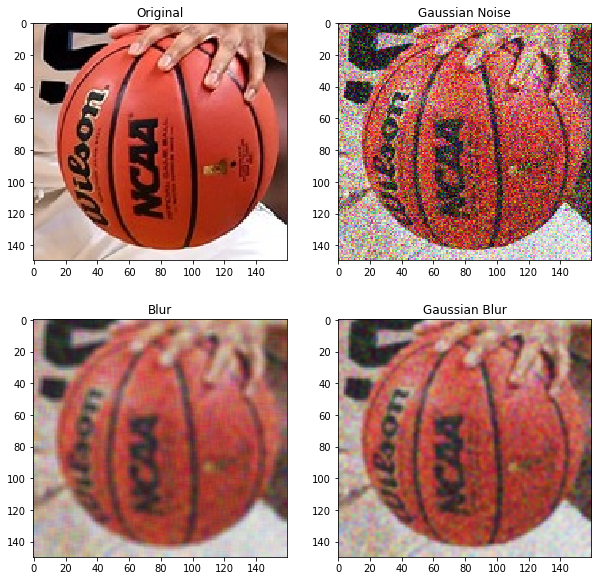

In [25]:
img_roi = img[360:510,810:970]
img_noisy_roi = img_noisy[360:510,810:970]

img_noisy_roi_blur = cv2.blur(img_noisy_roi,(5,5))
img_noisy_roi_gblur = cv2.GaussianBlur(img_noisy_roi,(5,5),0)

plt.subplot(221),plt.imshow(img_roi),plt.title('Original')
plt.subplot(222),plt.imshow(img_noisy_roi),plt.title('Gaussian Noise')
plt.subplot(223),plt.imshow(img_noisy_roi_wrong_smooth),plt.title('Blur')
plt.subplot(224),plt.imshow(img_noisy_roi_smooth),plt.title('Gaussian Blur')

### Bilateral FIltering
Remove noise and keep edges sharp

In [26]:
img_noisy_bilateral_blur = cv2.bilateralFilter(img_noisy_roi,9,75,75)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe93c352668>,
 Text(0.5,1,'Bilateral Blur'))

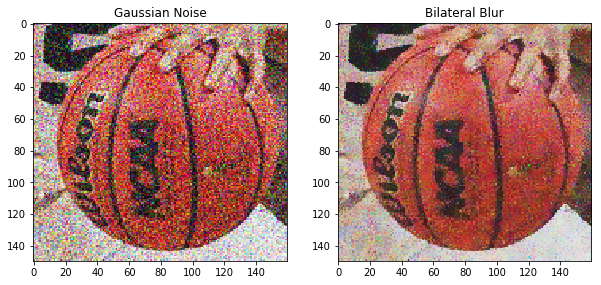

In [28]:
plt.subplot(221),plt.imshow(img_noisy_roi),plt.title('Gaussian Noise')
plt.subplot(221),plt.imshow(img_noisy_roi_blur),plt.title('Blur')
plt.subplot(221),plt.imshow(img_noisy_roi),plt.title('Gaussian Blur')
plt.subplot(224),plt.imshow(img_noisy_bilateral_blur),plt.title('Bilateral Blur')